# DS-SF-25 | Codealong 06 | Introduction to Regression and Model Fit

In [40]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [41]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06.csv'), index_col = 'ID')

df = read_dataset()

In [42]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,1.0,264.0,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,1.0,691.0,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,3.0,1738.0,2299.0,1976.0


## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

> #### Activity | How to scale SalePrice from \$ to \$M, Size and LotSize from sqft to "1,000 sqft"?

In [43]:
def scale_variables(df):
    df.SalePrice = df.SalePrice / (10 ** 6) # Sale price in $M
    df.Size = df.Size / (10 ** 3) # Size in 1,000 sqft
    df.LotSize = df.LotSize / (10 ** 3) # Lot size in 1,000 sqft
    # ===
    # TODO: Sale price in $M
    # TODO: Size in 1,000 sqft
    # TODO: Lot size in 1,000 sqft

scale_variables(df)

In [44]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


### `SalePrice` as a function of `Size`

In [45]:
def Xy(df):
    # TODO

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 01 Aug 2016   Prob (F-statistic):                nan
Time:                        20:17:52   Log-Likelihood:                    nan
No. Observations:                1000   AIC:                               nan
Df Residuals:                    1000   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 2

In [46]:
def Xy(df):
    # TODO: X
    # TODO: y

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          7.83e-177
Time:                        20:17:52   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predictions

In [47]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})

In [48]:
predict_X

,Size
0,1.2
1,1.4
2,1.6


In [49]:
predict_y = model.predict(predict_X)

In [50]:
predict_y

array([ 0.98116288,  1.14469003,  1.30821717])

In [51]:
type(predict_y)

numpy.ndarray

### `SalePrice` as a function of `Size` - Take 3

In [52]:
def Xy(df):
    # TODO: X
    # TODO: y

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        20:17:52   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predicitions (cont.)

In [53]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})
predict_X = sm.add_constant(predict_X)

In [54]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [55]:
predict_y = model.predict(predict_X)

In [56]:
predict_y

array([ 1.05472548,  1.2046711 ,  1.35461672])

### Model's parameters

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        20:17:52   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model.params

const    0.155052
Size     0.749728
dtype: float64

In [59]:
type(model.params)

pandas.core.series.Series

### t-values

In [60]:
model.tvalues

const     1.842394
Size     17.245775
dtype: float64

### p-values

In [61]:
model.pvalues

const    6.572416e-02
Size     2.667697e-58
dtype: float64

### Confidence Intervals

In [62]:
model.conf_int()

,0,1
const,-0.010102,0.320205
Size,0.664415,0.835041


In [63]:
type(model.conf_int())

pandas.core.frame.DataFrame

In [64]:
model.conf_int(alpha = 0.05).rename(columns = {0: '2.5%', 1: '97.5%'})

,2.5%,97.5%
const,-0.010102,0.320205
Size,0.664415,0.835041


In [65]:
model.conf_int(alpha = 0.1).rename(columns = {0: '5%', 1: '95%'})

,5%,95%
const,0.016492,0.293612
Size,0.678152,0.821304


## Part A2 - Simple Linear Regression (cont.)

#### Alternatively | Using a "formula"

In [66]:
model = smf.ols(formula = "SalePrice ~ Size", data = df).fit()
# ols in this case is lower cased
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        20:17:52   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` without `Intercept`

In [67]:
model = smf.ols(formula = "SalePrice ~ 0 + Size", data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          7.83e-177
Time:                        20:17:52   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop outliers

In [68]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    # TODO

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    # TODO

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [75]:
model = smf.ols(formula = "SalePrice ~ Size", data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           1.41e-45
Time:                        20:29:37   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How is a linear regression model fitted?

In [76]:
np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)

array([ 0.15505177,  0.74972809])

## Part C - How to check modeling assumptions?

### `.plot_regress_exog()`

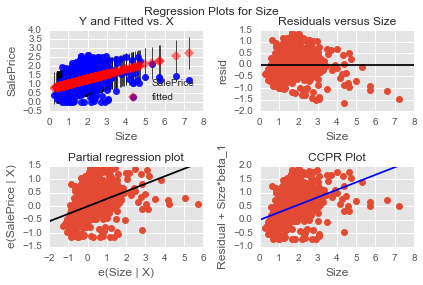

In [78]:
sm.graphics.plot_regress_exog(model, 'Size')

pass

## Part D1 - How to check normality assumption?

### Histogram of residuals

In [80]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

# TODO

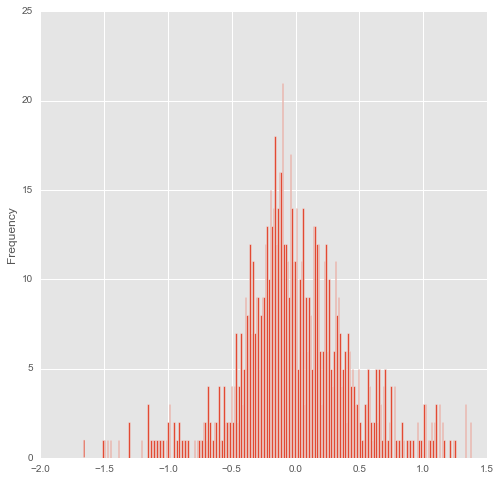

In [84]:
model.resid.plot(kind='hist', bins = 250, figsize = (8,8))

### q-q plot of residuals against a normal distribution

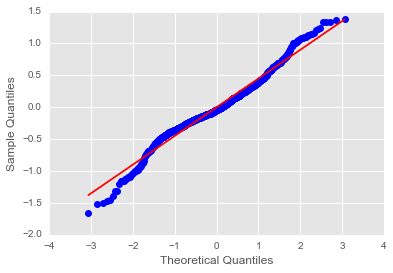

In [86]:
sm.qqplot(model.resid, line= 's')

pass

# 

> `line = 's'` shows a standardized line in which the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

## Part D2 - How to check normality assumption?

### q-q plot of two normal distributions

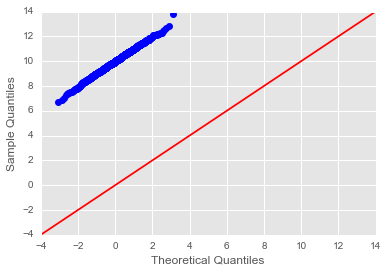

In [93]:
#not standardized
normal_array = np.random.normal(10, 1, size =1000)

sm.qqplot(normal_array, line= '45')

pass

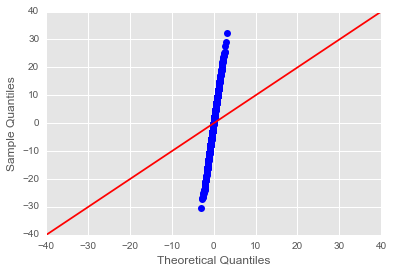

In [94]:
normal_array = np.random.normal(0, 10, size =1000)

sm.qqplot(normal_array, line= '45')

pass

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part E - Inference and Fit

In [96]:
# TODO: reload the dataset to get our outliers back...
# TODO: rescale the variables (use the function defined above)

df = read_dataset()
scale_variables(df)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

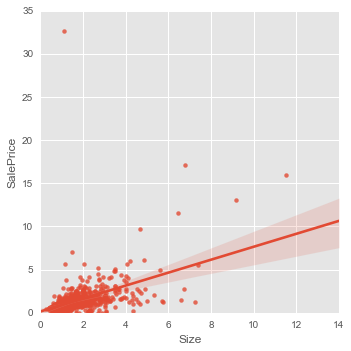

In [97]:
sns.lmplot('Size', 'SalePrice', df).set(xlim = (0, None), ylim = (0, None))

### `SalePrice` as a function of `Size` after dropping the outliers

Dropping outliers
- n (before) = 933
- Q1         = 0.788 ($M)
- Q2/Median  = 1.05 ($M)
- Q3         = 1.43 ($M)
- n (after)  = 915


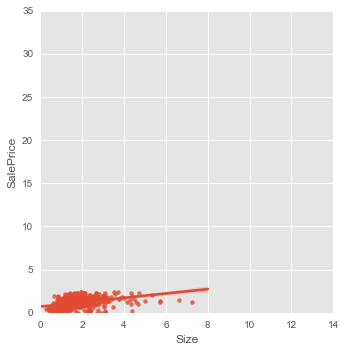

In [99]:
# TODO: drop outliers
drop_outliers(df)
# TODO: plot again using seaborn
sns.lmplot('Size', 'SalePrice', df).set(xlim = (0, 14), ylim = (0, 35))

## Part F - $R^2$

In [100]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### `SalePrice` as a function of `Size`

In [101]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        21:03:56   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $R^2$

In [102]:
model.rsquared

0.23559317159970783

### Effects of outliers on $R^2$

In [104]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # drop outliers
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

With outliers:
- SalePrice ~     Size; R^2 = 0.199855535471
- SalePrice ~ 0 + Size; R^2 = 0.796063918194

Dropping outliers
- n (before) = 933
- Q1         = 0.788 ($M)
- Q2/Median  = 1.05 ($M)
- Q3         = 1.43 ($M)
- n (after)  = 915

Without outliers:
- SalePrice ~     Size; R^2 = 0.184556217971
- SalePrice ~ 0 + Size; R^2 = 0.795147886439


## Part G - Multiple Linear Regression

In [105]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### `SalePrice` as a function of `Size` and `BedCount`

In [109]:
model = smf.ols(formula = 'SalePrice ~ BedCount', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           5.06e-30
Time:                        21:11:03   Log-Likelihood:                -1315.8
No. Observations:                 836   AIC:                             2636.
Df Residuals:                     834   BIC:                             2645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3927      0.093      4.244      0.000         0.211     0.574
BedCount       0.3831      0.032     11.844      0.000         0.320     0.447
==============================================================================
Omnibus:                     1034.263   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139768.779
Skew:                           6.216   Prob(JB):                         0.00
Kurtosis:                      65.112   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part H - Multicollinearity

### Transforming Variables (cont.)

> #### Activity | Create new variables `SizeLog` and `LotSizeLog` that represent the log of `Size` and `LotSize`.  Repeat using square root, cube root, square, and cube

In [110]:
df[ ['SizeLog', 'LotSize' ] ] = df[ ['Size', 'LotSize' ] ].apply(np.log10)

In [111]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear,SizeLog
ID,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0,-0.259637
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,0.386499,1948.0,0.155336
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,0.593286,1976.0,0.309630
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0,0.025306
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0,0.113609
...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0,-0.578396
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0,-0.160522
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,0.361539,1976.0,0.240050


### Multicollinearity

> #### Activity | Show the correlation between the different engineered features of  `Size`

In [ ]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeCbrt', 'SizeSquare', 'SizeCube'] ].corr()

#### `SalePrice` as a function of `Size` and its other engineered features

In [ ]:
# TODO

> #### Activity | What happened?

## Part I - Adjusted $R^2$

In [112]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

R^2 = 0.78071125631 (original model)


Let's now add some artificial noise.

In [113]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

In [114]:
formula

'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20 + X21 + X22 + X23 + X24 + X25 + X26 + X27 + X28 + X29 + X30 + X31 + X32 + X33 + X34 + X35 + X36 + X37 + X38 + X39 + X40 + X41 + X42 + X43 + X44 + X45 + X46 + X47 + X48 + X49 + X50 + X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58 + X59 + X60 + X61 + X62 + X63 + X64 + X65 + X66 + X67 + X68 + X69 + X70 + X71 + X72 + X73 + X74 + X75 + X76 + X77 + X78 + X79 + X80 + X81 + X82 + X83 + X84 + X85 + X86 + X87 + X88 + X89 + X90 + X91 + X92 + X93 + X94 + X95 + X96 + X97 + X98 + X99'

In [115]:
x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [116]:
print 'Model with artificial noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj

Model with artificial noise:
-          R^2 = 0.830706752745
- Adjusted R^2 = 0.775843200394
